In [146]:
import matplotlib.pyplot as plt 
import matplotlib
from math import cos, pi, sin
import random
plt.style.use('seaborn-v0_8')  # Более приятная тема графиков

In [147]:
def f(x):
    return (np.cos(x))**2

Аналитическое решение:
$$
\int_{a}^{b}\cos^2(x) = \left[\frac{x}{2} + \frac{\sin(2x)}{4} \right] \Bigg|_{a}^{b}
$$

In [148]:
def integral_analytical(a, b):
    return (b/2 + (sin(2*b)/4)) - (a/2 + (sin(2*a)/4))

Интеграл равен $$ \frac{\pi}{2} $$ проверю вычисление:

In [149]:
print(pi/2 - integral_analytical(0, pi))


0.0


In [150]:
def mse(real, predicted):
    return (real - predicted) **2

In [151]:
def mae(real, predicted):
    return abs(real - predicted)

In [152]:
def rectangle_method(f, a, b, n, mode="mid"):
    dx = (b - a) / n
    total = 0.0
    for i in range(n):
        x_left = a + i * dx
        x_right = x_left + dx

        if mode == "left":
            xi = x_left
        elif mode == "right":
            xi = x_right
        elif mode == "mid":
            xi = (x_left + x_right) / 2
        elif mode == "random":
            xi = random.uniform(x_left, x_right)
        total += f(xi) * dx
    return total


In [153]:
def trapezoid_method(f, a, b, n):
    dx = (b - a) / n
    total = 0.0
    
    for i in range(n):
        x_left = a + i * dx
        x_right = x_left + dx
        total += (f(x_left) + f(x_right)) * dx / 2
    
    return total


In [154]:
def simpson_method(f, a, b, n):
    if n % 2 != 0:
        n += 1  # Метод Симпсона требует чётного n
    dx = (b - a) / n
    total = f(a) + f(b)
    
    for i in range(1, n):
        x = a + i * dx
        if i % 2 == 0:
            total += 2 * f(x)
        else:
            total += 4 * f(x)
    
    return total * dx / 3


In [155]:
import numpy as np

Ошибка интегрирования методом прямоугольников: 0.0
Ошибка интегрирования методом трапеций: 0.0
Ошибка интегрирования методом Симпсона: 0.0


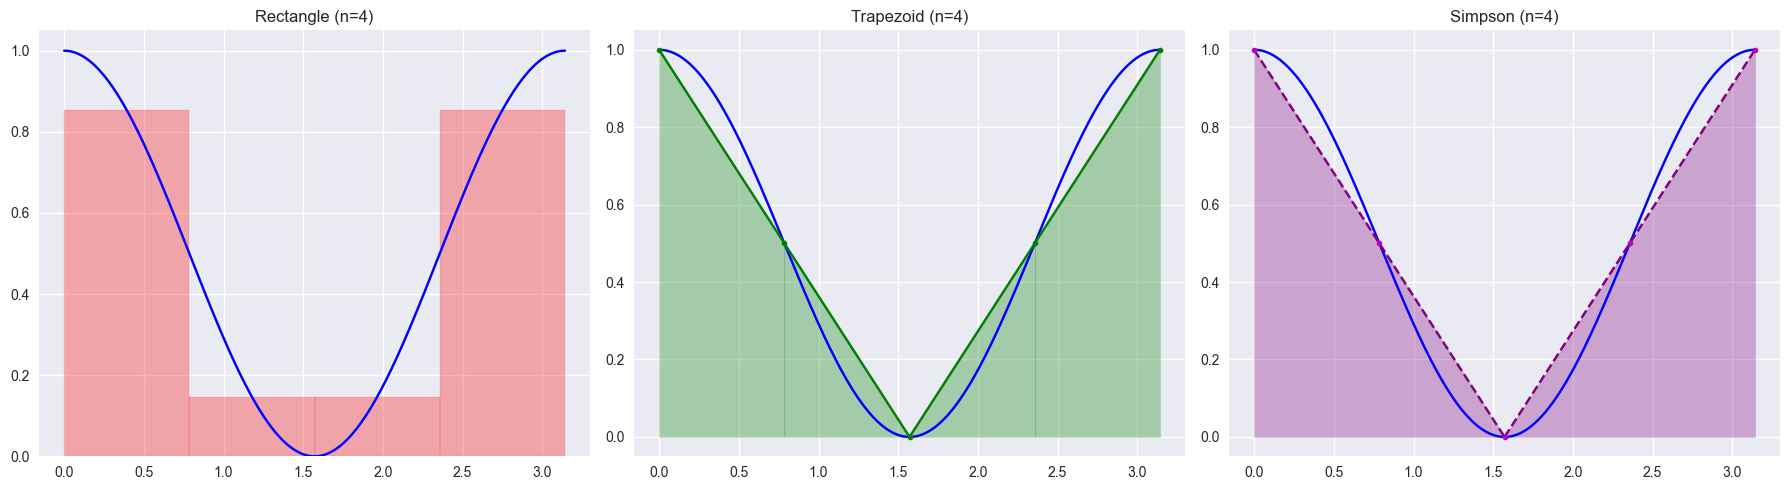

Ошибка интегрирования методом прямоугольников: 0.0
Ошибка интегрирования методом трапеций: 0.0
Ошибка интегрирования методом Симпсона: 0.0


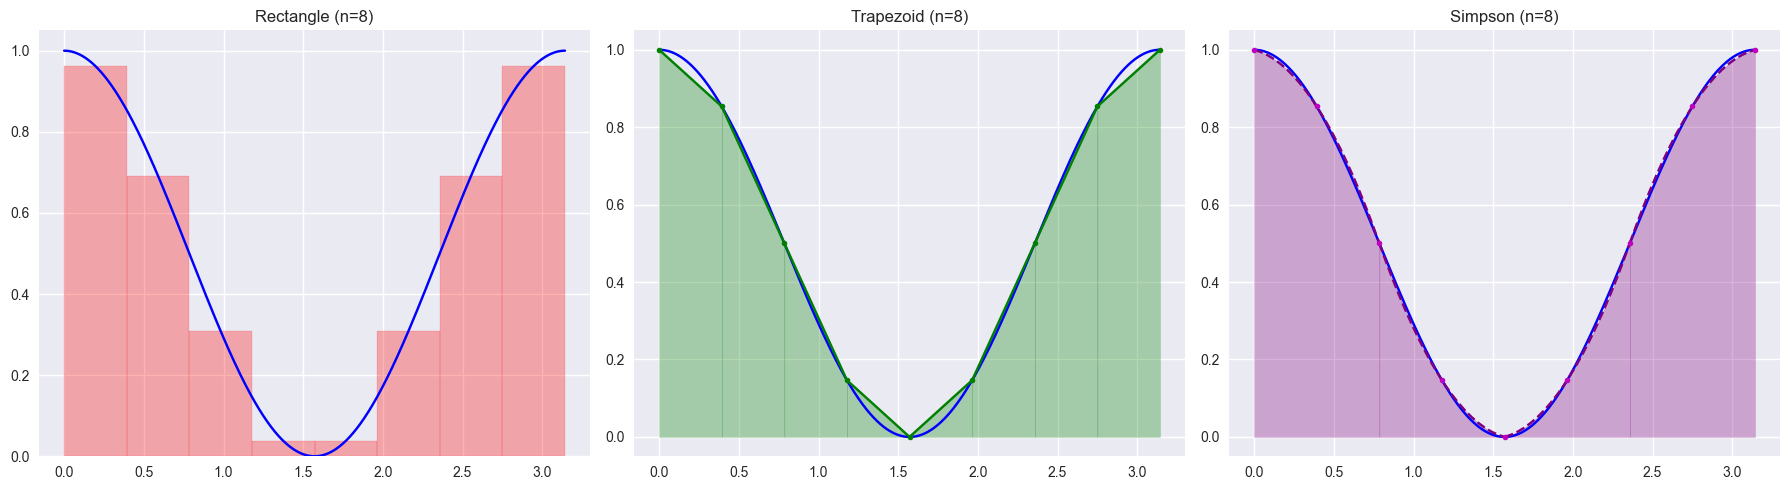

Ошибка интегрирования методом прямоугольников: 0.0
Ошибка интегрирования методом трапеций: 0.0
Ошибка интегрирования методом Симпсона: 2.220446049250313e-16


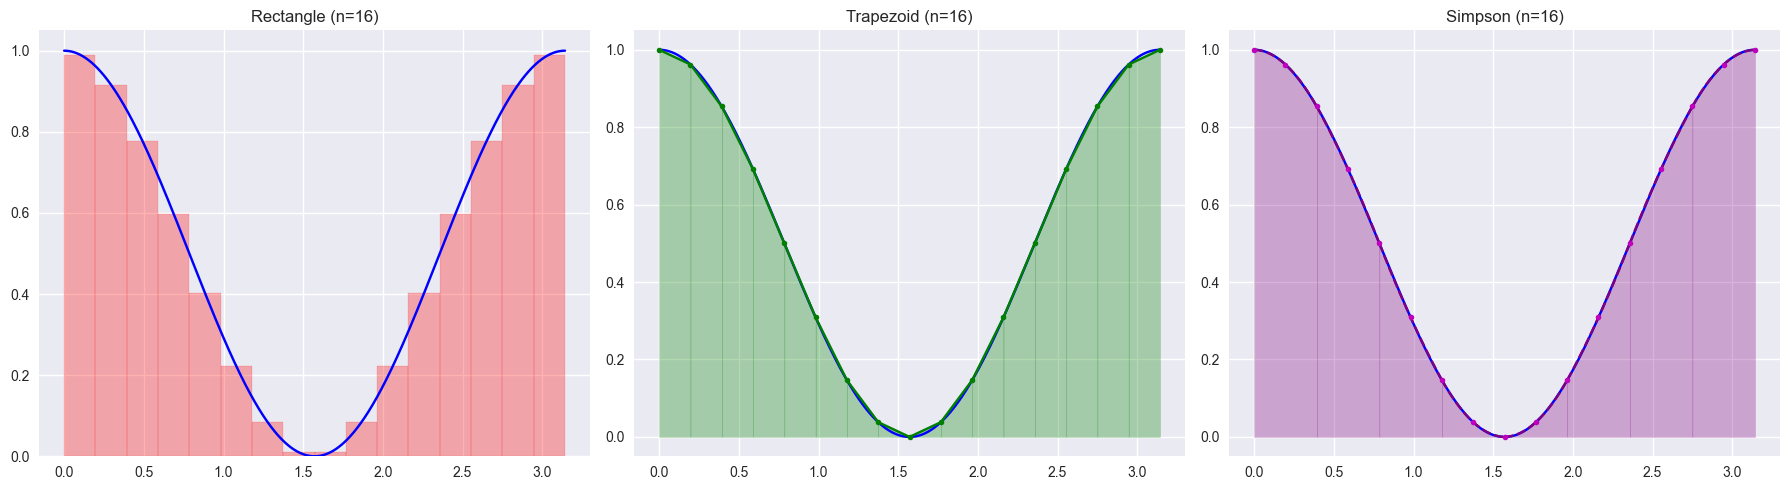

In [156]:
# f(x) = cos(x) ** 2
real_integral = pi/2
real = integral_analytical(0, pi)
for n in [4,8,16]:
    rectangle_int = rectangle_method(f, 0, pi, n, mode="mid")
    trapezoid_int = trapezoid_method(f, 0, pi, n)
    simpson_int = simpson_method(f, 0, pi, n)

    print(f"Ошибка интегрирования методом прямоугольников: {mae(real, rectangle_int)}")
    print(f"Ошибка интегрирования методом трапеций: {mae(real, trapezoid_int)}")
    print(f"Ошибка интегрирования методом Симпсона: {mae(real, simpson_int)}")


    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
    x_true = np.linspace(0, pi, 1000)
    x_points = np.linspace(0, pi, n+1)
    
    ax1.plot(x_true, f(x_true), 'b-')
    mid_points = (x_points[:-1] + x_points[1:])/2
    ax1.bar(mid_points, f(mid_points), width=pi/n, alpha=0.3, color='r', edgecolor='r')
    ax1.set_title(f'Rectangle (n={n})')
    
    ax2.plot(x_true, f(x_true), 'b-')
    for i in range(n):
        ax2.fill_between(x_points[i:i+2], f(x_points[i:i+2]), color='g', alpha=0.3)
    ax2.plot(x_points, f(x_points), 'go-', markersize=4)
    ax2.set_title(f'Trapezoid (n={n})')
    
    ax3.plot(x_true, f(x_true), 'b-')
    for i in range(0, n, 2):
        if i+2 > n:
            break
        x_quad = np.linspace(x_points[i], x_points[i+2], 20)
        coeffs = np.polyfit(x_points[i:i+3], f(x_points[i:i+3]), 2)
        y_quad = np.polyval(coeffs, x_quad)
        ax3.fill_between(x_quad, y_quad, color='purple', alpha=0.3)
        ax3.plot(x_quad, y_quad, 'purple', linestyle='--')
    ax3.plot(x_points, f(x_points), 'mo', markersize=4)
    ax3.set_title(f"Simpson (n={n})")
    
    plt.tight_layout()
    plt.show()

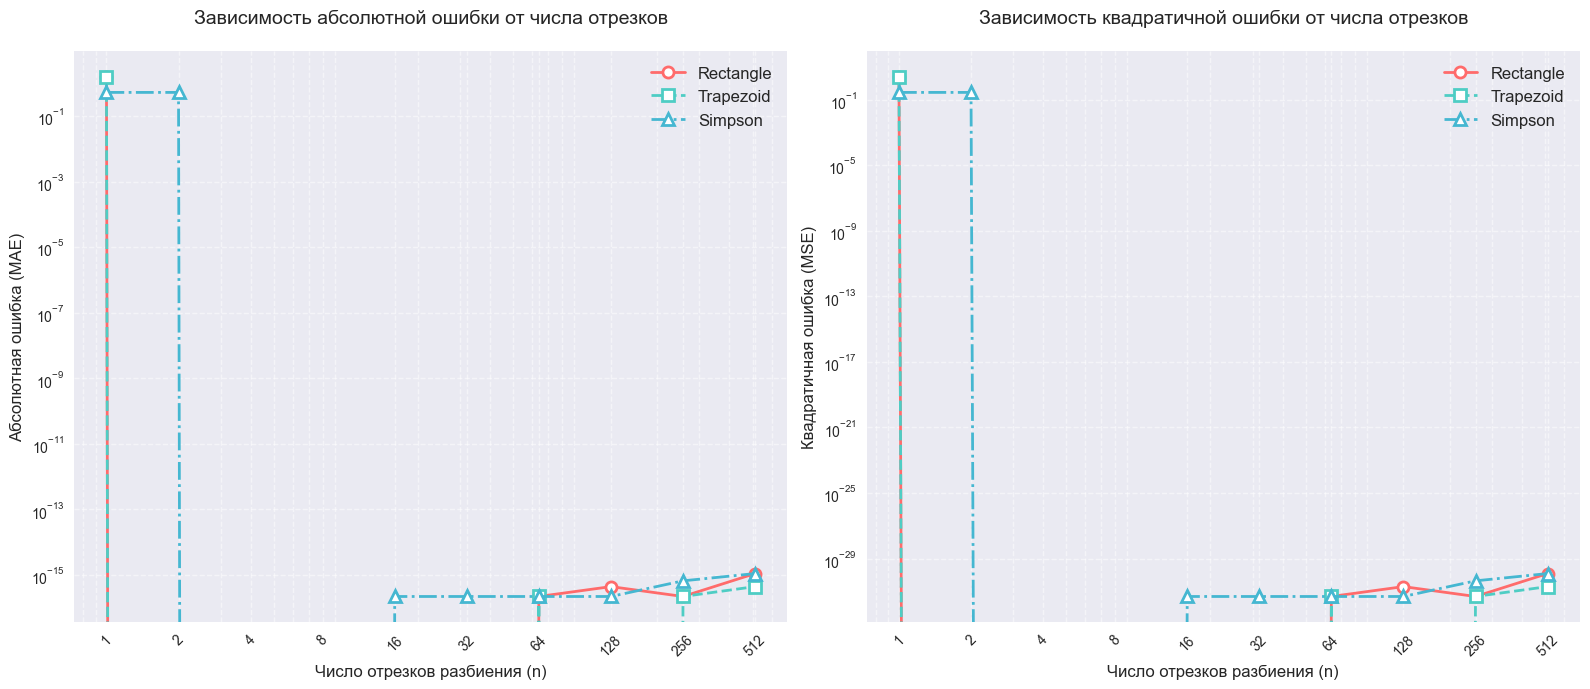

In [ ]:
n_values = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

errors = {
    'Rectangle': {'MAE': [], 'MSE': []},
    'Trapezoid': {'MAE': [], 'MSE': []},
    'Simpson': {'MAE': [], 'MSE': []}
}

for n in n_values:
    rect = rectangle_method(f, 0, pi, n)
    trap = trapezoid_method(f, 0, pi, n)
    simp = simpson_method(f, 0, pi, n)
    
    errors['Rectangle']['MAE'].append(abs(real_integral - rect))
    errors['Trapezoid']['MAE'].append(abs(real_integral - trap))
    errors['Simpson']['MAE'].append(abs(real_integral - simp))
    
    errors['Rectangle']['MSE'].append((real_integral - rect)**2)
    errors['Trapezoid']['MSE'].append((real_integral - trap)**2)
    errors['Simpson']['MSE'].append((real_integral - simp)**2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))


colors = {'Rectangle': '#FF6B6B', 'Trapezoid': '#4ECDC4', 'Simpson': '#45B7D1'}
markers = {'Rectangle': 'o', 'Trapezoid': 's', 'Simpson': '^'}
line_styles = {'Rectangle': '-', 'Trapezoid': '--', 'Simpson': '-.'}

# MAE
for method in errors:
    ax1.loglog(n_values, errors[method]['MAE'], 
               marker=markers[method], 
               color=colors[method],
               linestyle=line_styles.get(method, '-'),
               linewidth=2,
               markersize=8,
               label=f'{method}',
               markerfacecolor='white',
               markeredgewidth=2)

ax1.set_xlabel('Число отрезков разбиения (n)', fontsize=12)
ax1.set_ylabel('Абсолютная ошибка (MAE)', fontsize=12)
ax1.set_title('Зависимость абсолютной ошибки от числа отрезков', fontsize=14, pad=20)
ax1.grid(True, which="both", ls="--", alpha=0.5)
ax1.legend(fontsize=12, framealpha=1)

ax1.set_xticks(n_values)
ax1.set_xticklabels(n_values, rotation=45)
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# График MSE
for method in errors:
    ax2.loglog(n_values, errors[method]['MSE'], 
               marker=markers[method], 
               color=colors[method],
               linestyle=line_styles.get(method, '-'),
               linewidth=2,
               markersize=8,
               label=f'{method}',
               markerfacecolor='white',
               markeredgewidth=2)

ax2.set_xlabel('Число отрезков разбиения (n)', fontsize=12)
ax2.set_ylabel('Квадратичная ошибка (MSE)', fontsize=12)
ax2.set_title('Зависимость квадратичной ошибки от числа отрезков', fontsize=14, pad=20)
ax2.grid(True, which="both", ls="--", alpha=0.5)
ax2.legend(fontsize=12, framealpha=1)

ax2.set_xticks(n_values)
ax2.set_xticklabels(n_values, rotation=45)
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.tight_layout()
plt.show()